In [1]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
import json

In [48]:
string_to_output = "c"

In [3]:
set_of_appropriate_font_files = set([".ttf", ".otf"])

In [33]:
def gather_font_files(current_path: str, list_of_font_file_paths: list):
    if os.path.isdir(current_path):
        for item in os.listdir(current_path):
            if "MACOSX" in item:
                continue
            else:
                new_path = os.path.join(current_path, item)
                gather_font_files(new_path, list_of_font_file_paths)
    else:
        ext = os.path.splitext(os.path.basename(current_path))[-1]
        if ext in set_of_appropriate_font_files:
            list_of_font_file_paths.append(current_path)

In [18]:
def keep_track_of_which_fonts_are_wanted(font_dictionary_tracker: dict, font_path: str):
    use_font = input("If this font is to be used type: \'y\' else type: \'n\'. To quit type \'q\' --: ")

    if use_font == 'y':
        weight = input("Less: \'1\', Normal: \'2\', More: \'3\' --: ")
        valid_options = set(["1", "2", "3"])
        while weight not in valid_options:
            print("invalid options, try again.")
            weight = input("Less: \'1\', Normal: \'2\', More: \'3\' --: ")

        weight_as_int = int(weight)

        font_dictionary_tracker[font_path] = weight_as_int

    return use_font

In [19]:
def write_out_dictionary(dictionary: dict, output_path: str):
    with open(output_path, 'w') as json_out:
        json.dump(dictionary, json_out)

In [20]:
def load_existing_dictionary(output_path_to_fonts_and_weights: str):
    with open(output_path_to_fonts_and_weights, 'r') as json_in:
        font_dictionary_tracker = json.load(json_in)
    return font_dictionary_tracker

In [54]:
def get_image_as_array(font_path: str, font_size: int, background_color: int, font_color: int, text_start_multiplier: float, image_multiplier: int):
    font_object = ImageFont.truetype(font_path, font_size)
    temp_image = Image.new('RGB', (1, 1), color=(background_color, background_color, background_color))
    temp_draw = ImageDraw.Draw(temp_image)
    text_bbox = temp_draw.textbbox((0, 0), string_to_output, font=font_object)
    max_dim = max(text_bbox[2], text_bbox[3])
    image_width = image_multiplier*(text_bbox[2] - text_bbox[0]) # max_dim*5 # 
    image_height = image_multiplier*(text_bbox[3] - text_bbox[1]) # image_width # 
    image = Image.new('RGB', (image_width+5, image_height+5), color=(background_color, background_color, background_color))
    text_width = image_width
    text_height = image_height
    text_start_y = round(text_height*text_start_multiplier)
    text_start_x = round(text_width*text_start_multiplier)
    draw = ImageDraw.Draw(image)
    draw.text((text_start_x, text_start_y), string_to_output, font=font_object, fill=(font_color, font_color, font_color))
    image_as_array = np.array(image)
    return image_as_array, text_bbox

In [ ]:
def view_fonts_and_determine_use(font_paths: list, output_path_to_fonts_and_weights: str, use_existing_dict_in_output: bool):
    if use_existing_dict_in_output:
        font_dictionary_tracker = load_existing_dictionary(output_path_to_fonts_and_weights)
    else:
        font_dictionary_tracker = {}

    background_color = 100
    font_size = 240
    font_color = 0

    for index_in_font_paths, font_path in enumerate(font_paths):
        if font_path not in font_dictionary_tracker:
            print(index_in_font_paths)
            image_as_array, text_bbox = get_image_as_array(font_path=font_path, font_size=font_size, background_color=background_color, font_color=font_color, text_start_multiplier=0.3, image_multiplier=10)
            
            image_height, image_width, _ = image_as_array.shape

            top_of_text = 0
            bottom_of_text = image_height-1
            left_of_text = 0
            right_of_text = image_width-1

            height, width = image_as_array.shape[:2]

            for i in range(height):
                row = image_as_array[i, :, :]
                if np.any(row == font_color):
                    top_of_text = i
                    break

            for i in range((height-1), -1, -1):
                row = image_as_array[i, :, :]
                if np.any(row == font_color):
                    bottom_of_text = i
                    break

            for i in range(width):
                column = image_as_array[:, i, :]
                if np.any(column == font_color):
                    left_of_text = i
                    break

            for i in range((width-1), -1, -1):
                column = image_as_array[:, i, :]
                if np.any(column == font_color):
                    right_of_text = i
                    break

            if top_of_text > 0:
                top_of_text -= 1
            if bottom_of_text < image_height-1:
                bottom_of_text += 1
            if left_of_text > 0:
                left_of_text -= 1
            if right_of_text < image_width-1:
                right_of_text += 1

            if not np.any(image_as_array != background_color):
                print(font_path)
                print(text_bbox)
                print("Image width and height: ", image_width, image_height)
                print("New image width and height: ", (right_of_text-left_of_text), (bottom_of_text-top_of_text))

                image = Image.fromarray(image_as_array)
                plt.imshow(image)
                plt.axis("off")
                plt.show()

                array_of_interest = image_as_array[top_of_text:bottom_of_text, left_of_text:right_of_text, :]
                image = Image.fromarray(array_of_interest)

                plt.imshow(image)
                plt.axis("off")
                plt.show()
                

            """result = keep_track_of_which_fonts_are_wanted(font_dictionary_tracker, font_path)

            if index_in_font_paths % 10 == 0:
                write_out_dictionary(font_dictionary_tracker, output_path_to_fonts_and_weights)

            if result == "q":
                break"""

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
C:\Users\Jackson Roubidoux\RLL\repos\data_generator\handwriting_data_generator\fonts\feasibly-single-line-font\FeasiblySingleLine-z8D90.ttf
(0, 110, 73, 171)
Image width and height:  735 615
New image width and height:  734 614


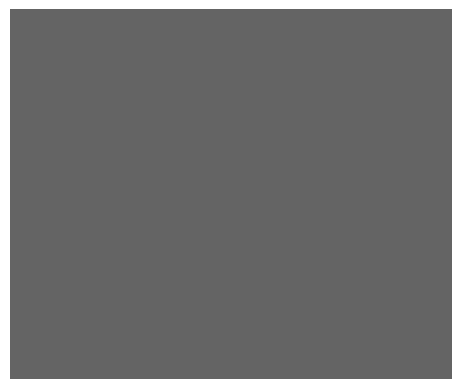

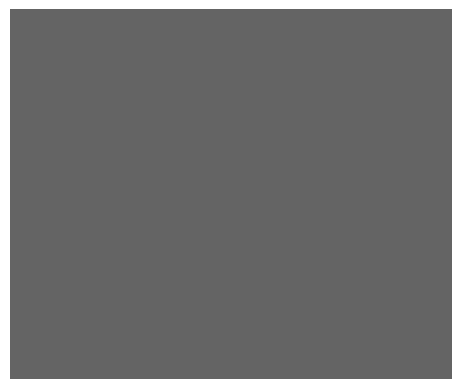

C:\Users\Jackson Roubidoux\RLL\repos\data_generator\handwriting_data_generator\fonts\feasibly-single-line-font\FeasiblySingleLine-z8D90.ttf
(0, 110, 73, 171)
20
Image width and height:  735 615
New image width and height:  734 614


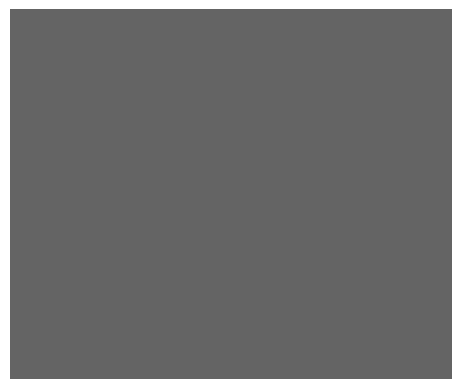

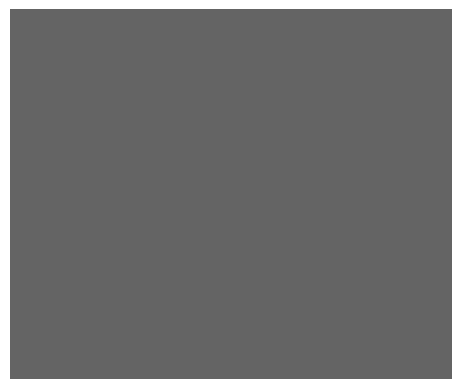

C:\Users\Jackson Roubidoux\RLL\repos\data_generator\handwriting_data_generator\fonts\feasibly-single-line-font\FeasiblySingleLine-z8D90.ttf
(0, 110, 73, 171)
40
Image width and height:  1465 1225
New image width and height:  734 614


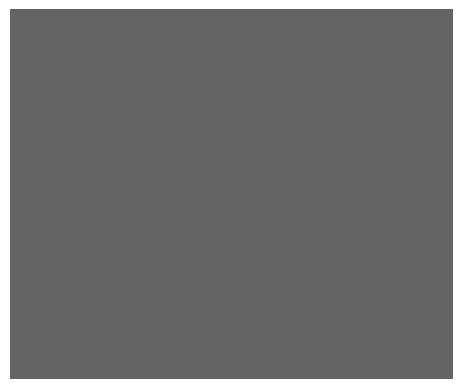

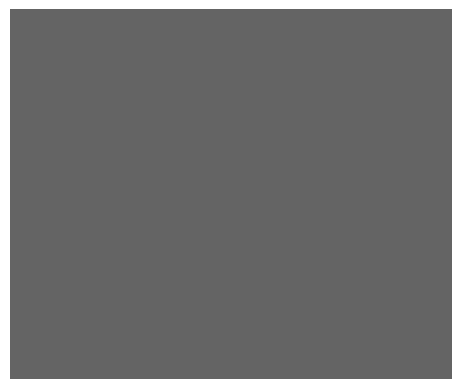

C:\Users\Jackson Roubidoux\RLL\repos\data_generator\handwriting_data_generator\fonts\feasibly-single-line-font\FeasiblySingleLine-z8D90.ttf
(0, 110, 73, 171)
80
Image width and height:  2925 2445
New image width and height:  734 614


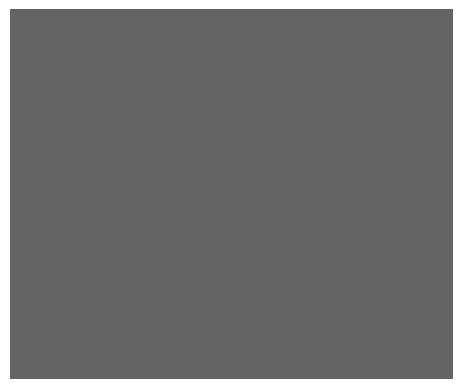

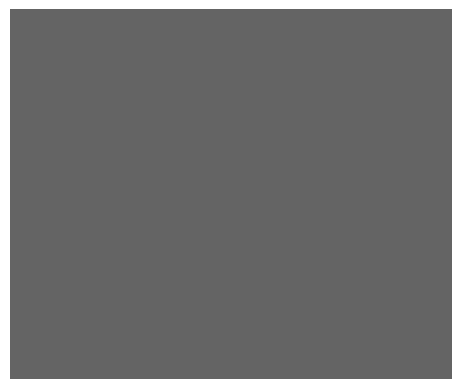

C:\Users\Jackson Roubidoux\RLL\repos\data_generator\handwriting_data_generator\fonts\feasibly-single-line-font\FeasiblySingleLine-z8D90.ttf
(0, 110, 73, 171)
160
Image width and height:  5845 4885
New image width and height:  734 614


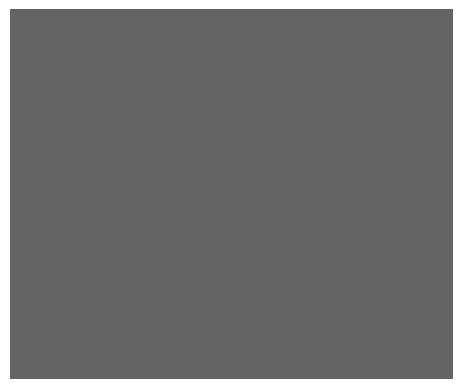

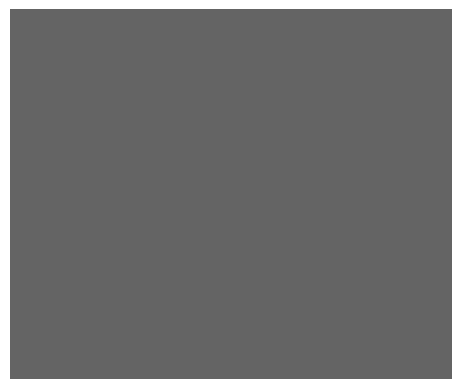

KeyboardInterrupt: 

In [60]:
path_to_root_directory_for_fonts = r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\handwriting_data_generator\fonts"
path_to_output_json_for_fonts_and_weights = r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\handwriting_data_generator\src\utils\good_fonts_for_period.json" #r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\sandbox\fonts_and_weights\temp.json"
font_paths = []
gather_font_files(path_to_root_directory_for_fonts, font_paths)
view_fonts_and_determine_use(font_paths, path_to_output_json_for_fonts_and_weights, False)
